In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('juego2020.csv')

In [5]:
data=data.astype({'player':'float64','action':'float64'})
data = data.set_index("player")
data = data.drop(188405223,axis=0)
data= data.drop(188405334,axis=0)
data= data.drop(128643036,axis=0)
data.sort_values(by=["player"], inplace=True)
data['time']=(data['time']/60)
#data.reset_index(inplace = True, drop = True)
numerica=data[['action','time','level']]
data['action'] = data['action'].replace([0],'Inicio de nivel')
data['action'] = data['action'].replace([1],'Accion en nivel')
data['action'] = data['action'].replace([3],'Termino de nivel')

In [6]:
data=data.astype({'action':'object'})
data.info()
numerica.corr().abs()[["time"]]

<class 'pandas.core.frame.DataFrame'>
Float64Index: 624 entries, 172672884.0 to 204309434.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   session    624 non-null    object 
 1   level      624 non-null    object 
 2   action     624 non-null    object 
 3   time       624 non-null    float64
 4   state      624 non-null    object 
 5   timestamp  624 non-null    object 
dtypes: float64(1), object(5)
memory usage: 34.1+ KB


,time
action,0.099066
time,1.000000


In [8]:
#INICIO 0,ACCION 2,FINAL 3

from plotnine import *

from plotnine import *

bins = list(range(0, 13, 1))
numerica["conteoTiempos"] = pd.cut(numerica["time"], bins=bins)
numerica = numerica.set_index("level")
#PARA HACER CALCULOS CON DENSIDAD DESCOMENTAR TODO
#numerica = numerica.drop('Union_Interseccion',axis=0)
#numerica = numerica.drop('Velocidad_y_fuerza',axis=0)
#numerica = numerica.drop('Mirrors_1',axis=0)
#numerica = numerica.drop('NIVEL_FINAL',axis=0)


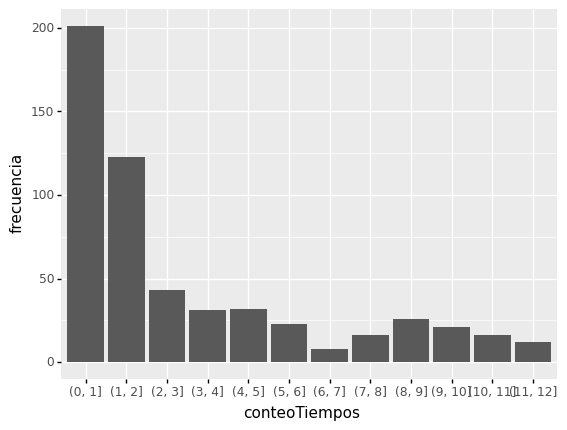

<ggplot: (162570962324)>

In [9]:

conteoTiempos=(numerica.groupby('conteoTiempos' ).agg(frecuencia=("time", "count")).reset_index())


ggplot(conteoTiempos) + geom_bar(aes(x = "conteoTiempos", y = "frecuencia"), stat = 'identity')

In [6]:
#media aritmetica
mediana=numerica["time"].mean()
#desviacion media
desviacionMedia=numerica["time"].mad()
#varianza aritmetica,no omite valores faltantes
varianza=numerica["time"].var(ddof=0)
#desviacion tipica
desviacionTipica=numerica["time"].std(ddof=0)
print('El conjunto de  {} \nMediana : {}\nVarianza: {}\nDesviacionMedia: {}\nDesviacionTipica: {}'.format('niveles',mediana,varianza,desviacionMedia,desviacionTipica))

El conjunto de  niveles 
Mediana : 3.1015491452991473
Varianza: 13.143535705561945
DesviacionMedia: 2.942571875684864
DesviacionTipica: 3.625401454399491


In [10]:
#La dispesion se ve con esta formula,entonces  la comparacion desviaciones tipicas por nivel
(numerica
 .groupby("level")
 .agg(dispercionTiempo=("time", "std")))

#(ggplot(numerica) +
 # geom_histogram(aes(x="time"), binwidth=0.25, colour='lightgrey')
  #+facet_grid("level ~ ."))


,dispercionTiempo
level,
Densidad_de_Objetos,2.933755
Mirrors_1,4.243892
NIVEL_FINAL,0.000000
Union_Interseccion,0.661408
Velocidad_y_fuerza,3.328058


In [12]:
conteoTiempos["frecuencia_acum"] = conteoTiempos["frecuencia"].cumsum()
conteoTiempos

data=data.astype({'action':'string'})
data[(data.action == 'Inicio de nivel')& (data.level=='NIVEL_FINAL') ]

,session,level,action,time,state,timestamp
player,,,,,,
172672884.0,B5E821B046054D37C48CB2B44A50617D,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Stahn, Player2: Leon",2020-12-03 02:11:39.149585
195160872.0,078E0F784B8F647BEE95B9A051B78D6E,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: nico, Player2: drak",2020-11-27 00:08:08.266095
197299339.0,E8D3CF9C421324215943ED8C82DE314C,NIVEL_FINAL,Inicio de nivel,0.0,"Inicio del nivel,Player 1: Claudio, Player2: M...",2020-11-27 20:44:48.229018


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
#ancho y largo
hue_colors = {'Inicio de nivel': 'yellow',
              'Accion en nivel': 'blue', 
              'Termino de nivel': 'red'}

sizes_actions = {'Accion en nivel': 10, 
              'Inicio de nivel': 50, 
              'Termino de nivel': 50}

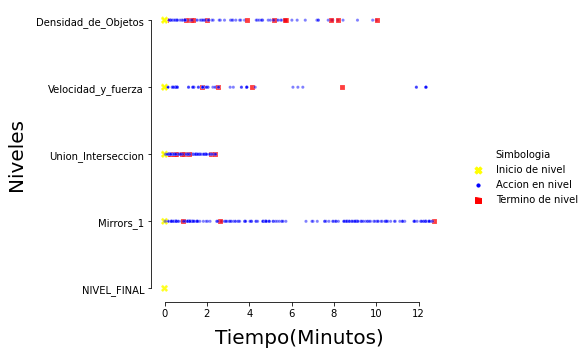

In [15]:
orden= ['Inicio de nivel','Accion en nivel','Termino de nivel']
g=sns.relplot(data=data,x='time',y='level',hue='action',hue_order=orden,size='action',sizes=sizes_actions,style='action',alpha=.5,palette=hue_colors, height=6)
g.set_axis_labels("Tiempo(Minutos)", "Niveles", labelpad=10,fontsize=20)
g.legend.set_title("Simbologia")
#g.ax.margins(.15)
g.fig.set_size_inches(8.5, 4.5)
g.despine(trim=True)

<AxesSubplot:xlabel='time', ylabel='level'>

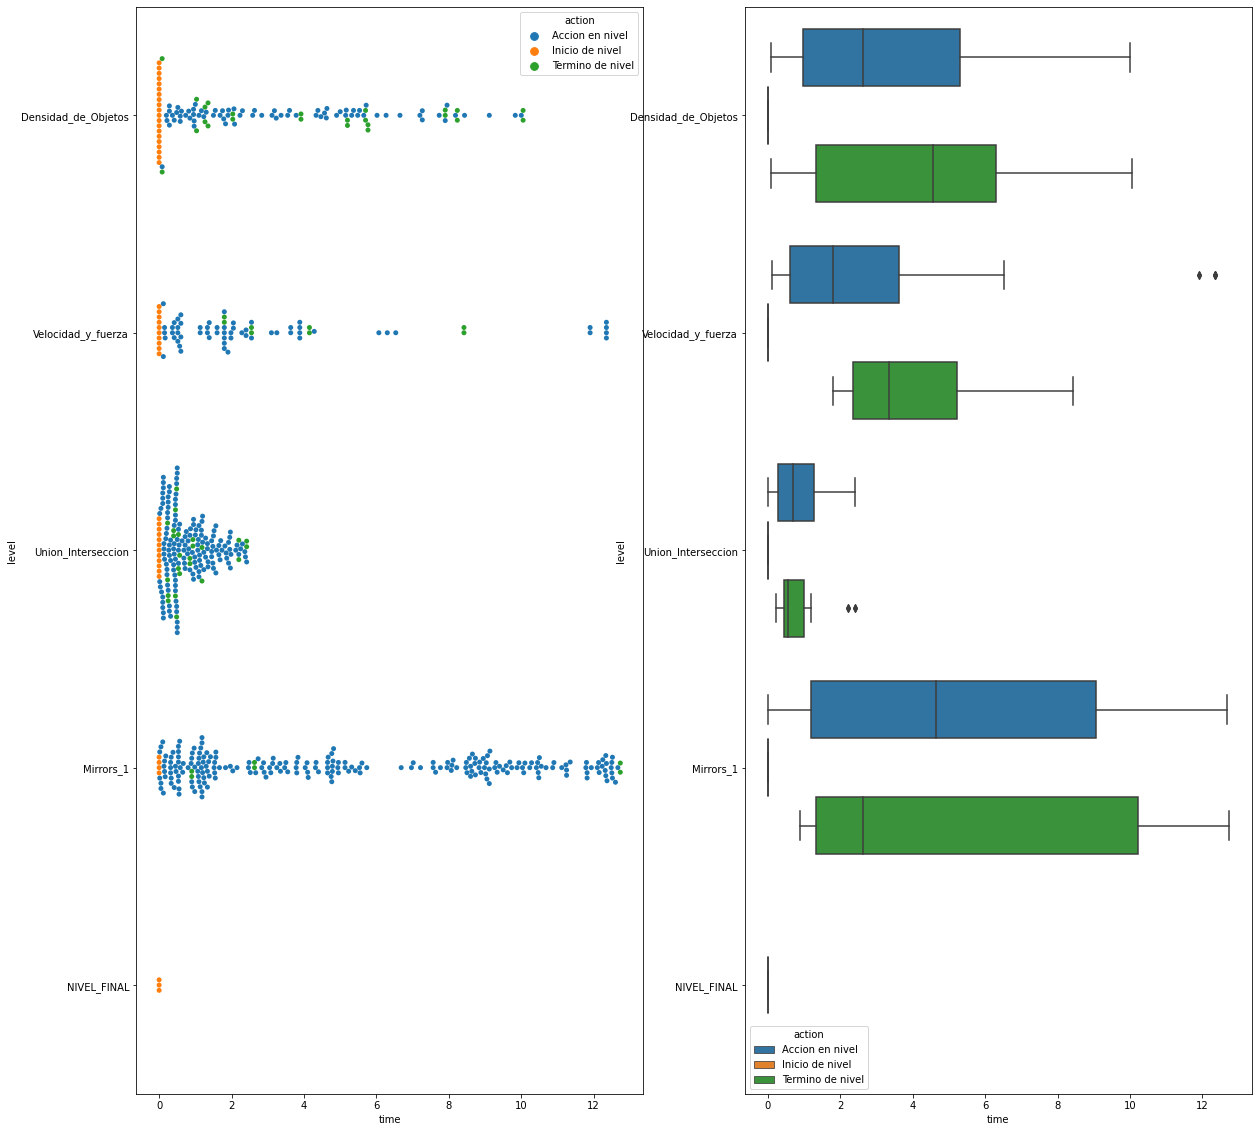

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
#ancho y largo
fig, axs = plt.subplots(ncols=2, figsize=(20,20))
sns.swarmplot(x="time", y="level", hue="action", data=data, ax=axs[0])
sns.boxplot(x="time", y="level", hue="action", data=data, ax=axs[1])
#violinplot